**Linear_regression**

In [96]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**Q1: Мы предполагаем, что существует взаимосвязь между количеством часов, потраченных студентом на обучение, и результатами теста. Чем больше студент занимается, тем лучше результат теста будет. Посмотрим, так ли это.**

In [98]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [99]:
x = df.JoiningYear 
y = df.Age

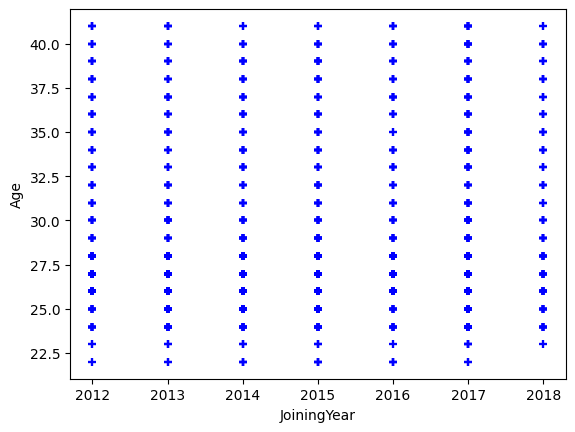

In [100]:
plt.xlabel('JoiningYear')
plt.ylabel('Age')
plt.scatter(df.JoiningYear,df.Age,color='blue',marker='+')


По графику видно, что существуют линейная зависимость, теперь надо проверить это. Сначала находим по формулам slope и intercept

In [101]:
slope = np.sum((x - np.mean(x))*(y - np.mean(y)))/(np.sum((x-np.mean(x)) ** 2))
slope

0.034097692090938256

In [102]:
intercept = np.mean(y) - slope*np.mean(x)
intercept

-39.31570205062133

In [103]:
def simplelinearmodel(x):
    return intercept+slope*x
y_predicted = simplelinearmodel(x)

In [104]:
y_predicted

0       29.459343
1       29.322952
2       29.357050
3       29.425245
4       29.459343
          ...    
4648    29.322952
4649    29.322952
4650    29.493441
4651    29.288854
4652    29.391148
Name: JoiningYear, Length: 4653, dtype: float64

In [105]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=0.034097692090937805, intercept=-39.31570205062042, rvalue=0.013165292965872426, pvalue=0.3692706094359174, stderr=0.03797376397938978, intercept_stderr=76.51955834063287)

In [106]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.00017332493887711742